
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the 'total market' which we define as sp500, sp400, nasdaq100, and dow30.  Construct portfolios from the 'total market' and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy', 'sp400-galaxy', 'nasdaq100-galaxy', 'dow30-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M Company,US Stocks:Industrials,200.83,56.00,15.62,-3.66,6.24,30.75,15.51,22.65,-3.66,-82.90
1,ABT,Abbott Laboratories,US Stocks:Healthcare,356.66,74.88,42.69,32.75,30.10,27.34,8.30,19.62,32.75,1.67
2,ABBV,AbbVie Inc.,US Stocks:Healthcare,-34.32,50.00,14.18,3.73,19.43,29.56,20.01,30.92,3.73,0.12
3,ABMD,ABIOMED Inc,US Stocks:Healthcare,-0.30,81.43,84.57,12.24,35.52,45.56,24.64,47.80,12.24,0.26
4,ACN,Accenture plc,US Stocks:Technology,-11.07,32.68,23.01,21.51,24.67,22.81,14.00,23.39,21.51,0.92
5,ATVI,Activision Blizzard,US Stocks:Communication Services,335.06,244.81,69.04,16.77,29.84,40.43,14.58,31.03,16.77,0.54
6,ADBE,Adobe Inc.,US Stocks:Technology,58.01,19.57,33.41,38.57,46.16,24.64,13.76,23.87,38.57,1.62
7,AMD,Advanced Micro Devices Inc,US Stocks:Technology,-46.23,52.38,71.65,101.91,117.44,37.73,25.26,56.68,101.91,1.80
8,AAP,Advance Auto Parts,US Stocks:Consumer Discretionary,-48.35,14.75,23.46,14.28,3.02,34.94,24.47,35.53,14.28,0.40
9,AES,AES Corp,US Stocks:Utilities,190.10,209.90,37.45,44.90,28.44,51.66,31.69,27.57,44.90,1.63


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
324,NEE,NextEra Energy,US Stocks:Utilities,85.75,55.37,27.99,36.12,28.24,30.64,21.52,15.80,36.12,2.29
33,AWK,American Water Works Company Inc,US Stocks:Utilities,91.64,7.69,23.63,31.69,22.44,20.00,9.75,15.89,31.69,1.99
163,ENPH,Enphase Energy,US Stocks:Technology,2.35,787.31,409.51,345.85,153.24,69.73,43.60,80.56,345.85,4.29
306,MSFT,Microsoft Corp.,US Stocks:Technology,275.10,54.44,33.05,43.90,40.11,23.77,11.06,18.36,43.90,2.39
763,REXR,"Rexford Industrial Realty, Inc.",US Stocks:Real Estate,145.94,30.35,1.76,26.51,28.06,28.88,14.25,18.13,26.51,1.46
697,MPW,Medical Properties Trust Inc,US Stocks:Real Estate,138.98,96.29,0.30,31.05,24.69,23.81,10.52,21.88,31.05,1.42
60,BLL,Ball Corp,US Stocks:Materials,-8.28,-12.02,16.69,33.88,23.55,25.19,15.50,22.43,33.88,1.51
510,ATR,AptarGroup Inc,US Stocks:Materials,50.76,84.86,24.91,22.27,15.58,23.64,15.59,17.62,22.27,1.26
617,GNRC,Generac Holdings Inc.,US Stocks:Industrials,110.97,150.81,151.78,81.36,58.30,44.76,24.24,31.11,81.36,2.62
794,RUN,Sunrun Inc.,US Stocks:Industrials,-91.21,292.01,287.88,144.68,61.08,61.89,43.26,82.84,144.68,1.75


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NEE,AWK,ENPH,MSFT,REXR,MPW,BLL,ATR,GNRC,RUN,...,HES,SAM,COST,CMG,ETSY,CABO,TMUS,TEAM,ASML,Ranked Portfolio
Annual Returns,36.12,31.69,345.85,43.90,26.51,31.05,33.88,22.27,81.36,144.68,...,13.71,84.47,28.26,79.74,133.48,46.56,28.35,72.88,48.26,80.36
Std Dev,15.80,15.89,80.56,18.36,18.13,21.88,22.43,17.62,31.11,82.84,...,53.24,47.35,16.84,35.94,64.05,25.46,22.24,32.36,26.43,33.84
Sharpe Ratio,2.29,1.99,4.29,2.39,1.46,1.42,1.51,1.26,2.62,1.75,...,0.26,1.78,1.68,2.22,2.08,1.83,1.27,2.25,1.83,2.37
Weight,0.05,0.04,0.08,0.01,0.07,0.08,0.04,0.03,0.03,0.05,...,0.02,0.08,0.03,0.03,0.04,0.04,0.03,0.05,0.03,1.00
Worst Typical Down Year,4.52,-0.09,184.73,7.18,-9.75,-12.71,-10.98,-12.97,19.14,-21.00,...,-92.77,-10.23,-5.42,7.86,5.38,-4.36,-16.13,8.16,-4.60,12.67
Black Swan,-11.28,-15.98,104.17,-11.18,-27.88,-34.59,-33.41,-30.59,-11.97,-103.84,...,-146.01,-57.58,-22.26,-28.08,-58.67,-29.82,-38.37,-24.20,-31.03,-21.18


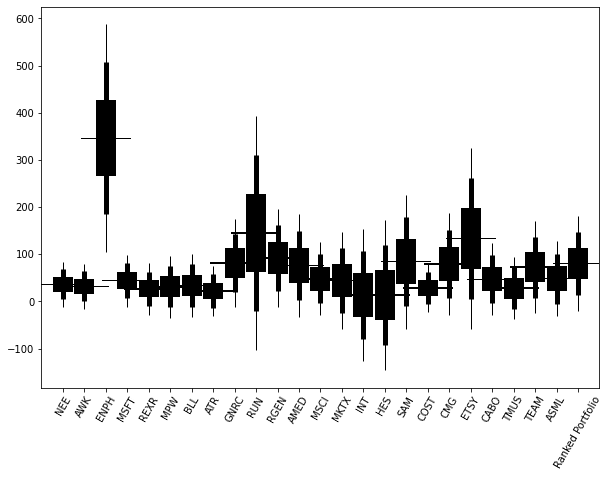

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

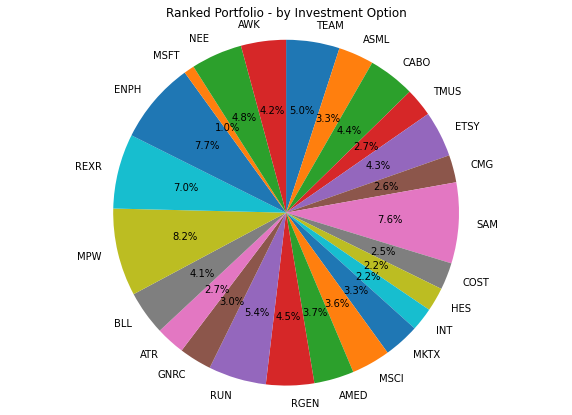

TEAM   0.05
ASML   0.03
CABO   0.04
TMUS   0.03
ETSY   0.04
CMG    0.03
SAM    0.08
COST   0.03
HES    0.02
INT    0.02
MKTX   0.03
MSCI   0.04
AMED   0.04
RGEN   0.04
RUN    0.05
GNRC   0.03
ATR    0.03
BLL    0.04
MPW    0.08
REXR   0.07
ENPH   0.08
MSFT   0.01
NEE    0.05
AWK    0.04



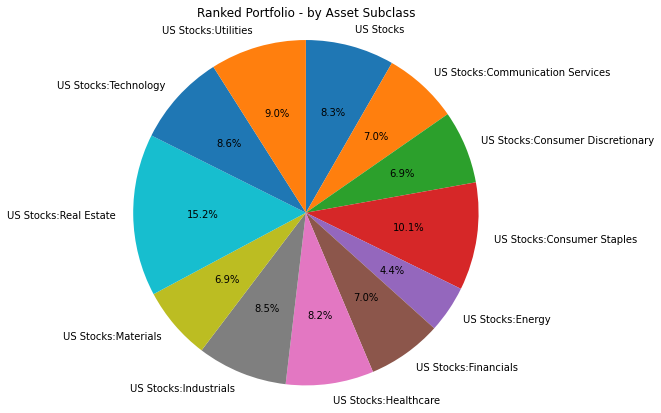

US Stocks                          0.08
US Stocks:Communication Services   0.07
US Stocks:Consumer Discretionary   0.07
US Stocks:Consumer Staples         0.10
US Stocks:Energy                   0.04
US Stocks:Financials               0.07
US Stocks:Healthcare               0.08
US Stocks:Industrials              0.08
US Stocks:Materials                0.07
US Stocks:Real Estate              0.15
US Stocks:Technology               0.09
US Stocks:Utilities                0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NEE                            0.0479
    AWK                            0.0421
    ENPH                           0.0765
    MSFT                           0.0097
    REXR                           0.0700
    MPW                            0.0820
    BLL                            0.0414
    ATR                            0.0272
    GNRC                           0.0304
    RUN                            0.0541
    RGEN                           0.0449
    AMED                           0.0373
    MSCI                           0.0363
    MKTX                           0.0335
    INT                            0.0218
    HES                            0.0223
    SAM                            0.0755
    COST                           0.0253
    CMG                            0.0256
    ETSY                           0.0429
    CABO                           0.0437
    TMUS                           0.0266
    TEAM                           0.0499
    ASML

### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer............

Ranked Portfolio Metrics:          
    max_sharpe_ratio           2.91
    annual_return             91.77
    std_dev                   31.52
    worst typical down year   28.72
    black_swan                -2.80


Ranked Portfolio Weights:
    NEE                            0.0900
    AWK                            0.0800
    ENPH                           0.1300
    MSFT                           0.0700
    REXR                           0.0900
    MPW                            0.0000
    BLL                            0.0400
    ATR                            0.0000
    GNRC                           0.0300
    RUN                            0.0000
    RGEN                           0.0500
    AMED                           0.0700
    MSCI                           0.0000
    MKTX                           0.0500
    INT                            0.0000
    HES                            0.0000
    SAM                            0.0000
    COST   

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).